In [1]:
import sys; sys.path.append("../../automl/");
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import polars as pl
import numpy as np

from tqdm.auto import tqdm

from sklearn.metrics import roc_auc_score

In [2]:
# Путь к папке с тренировочными данными
path_train = '../../train'
# Путь к папке с тестовыми данными
path_test = '../../test'

print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

FileNotFoundError: [Errno 2] No such file or directory: '../../train'

In [3]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pl.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pl.concat(data_files_train)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts()

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,…,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,"""train""",123957,-0.599917,-0.979222,-0.970136,0.172732,1.3997241,2.2270525,2.0,2.6352675,-0.580033,1.6347511,2.541147,1.2339827,-0.274903,0.72187,-0.442428,2.2790852,2.0078325,2.13952,0.4865929,-0.337672,2.0521777,2.303956,0.9279383,0.816427,-1.879786,-0.849007,1.3672483,2.3950152,2.2081988,-0.706264,3.0,-0.589487,2.725103,-0.919189,…,-1.128765,0.38915,0.5249397,-1.875642,-0.837085,-1.966115,1.0,1.482465,1.6264096,-0.434501,1.1799253,2.5329351,-2.587425,11.0,-0.238586,0.90664,-0.521662,2.0,-0.666689,-1.546374,-1.28783,-0.934616,1.15676,-2.018742,0.846383,0.115659,-1.23876,2.2758663,-1.82197,9.0,-1.232141,2.244367,-0.199707,1.4544683,1.5227902,3.0,2.3448036
0,"""train""",123958,0.404078,-0.22878,0.16416,0.855858,-0.051261,0.324444,2.0,0.277687,-0.088631,-0.697138,0.9940974,-1.310732,2.580343,1.7223972,-0.798751,0.215995,-0.016953,0.18755,0.594394,-1.017908,1.469436,-0.193638,0.560898,-0.850113,0.387682,0.041834,1.2149135,0.089677,-0.165375,1.0799298,2.0,1.411101,-0.236077,1.5876421,…,1.3784528,0.1255014,1.0063273,0.060507,-0.953121,-2.016275,1.0,-1.053333,0.4011569,-1.843249,2.2462938,0.880402,-0.726015,2.0,-1.471716,0.5381325,1.9371129,2.0,0.094076,0.5588832,-0.660455,-0.647169,0.097021,-2.472553,0.6529713,0.301096,-0.206437,0.241131,0.5584484,9.0,-0.934535,1.1784424,0.389077,-0.361016,0.345436,2.0,-0.166686
1,"""train""",123959,2.3183358,-1.146061,0.2516567,0.080618,-0.042581,-0.829405,2.0,-1.050294,0.172746,1.8091776,-0.319583,-0.670207,-1.456662,0.710699,1.6936148,0.282344,0.187894,-0.752219,0.591228,-1.698427,-1.000732,1.0102011,0.6149483,-1.069627,2.1004968,-1.039689,0.526928,-0.809631,-0.571301,2.5761242,2.0,-0.069702,-0.904703,-0.409122,…,-0.811562,0.975144,1.3655033,0.408497,0.848559,0.616207,1.0,0.380913,1.7885059,0.709931,0.3588114,-0.60711,-1.517985,2.0,1.194082,1.4663336,-0.341336,2.0,-0.574894,1.5810995,-0.996231,0.7594642,0.926543,0.9477968,0.24041,0.5827988,-0.337053,-1.227211,2.6601822,9.0,2.2574854,0.9222718,-1.469199,-1.028045,0.907549,2.0,-0.557001
0,"""train""",123960,-2.423907,-0.501866,-0.499705,-0.701717,0.0635604,-1.439272,2.0,-0.953299,-0.677438,-0.63073,-1.895528,-0.250833,0.3876722,-0.512248,-0.320339,-1.552678,-1.033203,-0.992801,0.159479,-0.940643,-0.992449,-0.716195,-1.088063,0.976635,-0.876452,-1.255683,-0.405512,-0.685723,-1.237211,0.51332,2.0,-0.536171,-1.171458,-0.617709,…,1.7326792,0.018565,-0.369532,-1.452736,-1.29264,-0.066368,1.0,-0.537009,-0.622001,1.0920049,0.242739,-2.194372,1.4767612,2.0,0.9939444,1.7086039,-0.432479,2.0,-0.242886,-2.232732,-0.806296,-0.776328,0.8699622,1.4892131,-0.876074,0.812904,-1.532245,-0.660922,0.2631096,9.0,-0.176465,-0.570582,-2.261909,-0.785268,0.4304304,2.0,-0.278513
0,"""train""",123961,-0.269916,-0.116197,0.6999975,-1.295687,-0.562152,0.832434,2.0,-0.414195,-1.637757,2.4676135,1.0218097,1.3289325,0.68807,-0.701532,0.2329233,0.9607027,-1.561317,0.326

smpl,count
str,u32
"""train""",413194


In [4]:
# Получим список путей к файлам в папке train
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_test = []

# Считаем все файлы train и добавим их в список
for filename in filenames_test:
    data_files_test.append(pl.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_test = pl.concat(data_files_test)

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки train
data_test['smpl'].value_counts()

smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,…,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""test""",413194,-0.589627,-1.061564,-0.950936,0.3247137,0.884931,-2.461308,4.0,-0.545123,1.4055241,0.042274,-0.846733,-1.730768,-0.740489,1.2306892,-1.254324,-0.745095,0.8058862,-1.699575,0.023775,-0.605147,-0.820757,0.008301,1.1040843,0.240653,-1.466814,-0.694286,-1.136491,1.1352086,-0.875571,-0.248568,3.0,-1.44388,-1.017062,-0.825851,-1.191383,…,0.8495294,0.169598,-0.864438,-0.246,-0.78941,0.950761,0.0,-0.066635,0.9783755,-0.530811,-1.055202,-0.650855,-2.096716,1.0,-0.08863,-0.719675,-0.532028,1.0,1.0239327,-0.520995,2.1076465,-0.860648,-0.440602,1.0253189,0.212175,-0.73334,-0.106875,-1.291434,-0.084685,9.0,-0.181098,-1.563904,0.640471,-0.533898,0.766548,10.0,-0.403965
"""test""",413195,0.178462,0.447035,-2.641815,0.7707432,-1.708153,0.55056,2.0,0.014214,-0.088672,-0.393833,1.0067562,1.2272941,1.272638,0.1738418,0.341379,0.811305,-0.106851,0.2931628,1.4777474,-1.467769,1.8060861,-1.6058,0.446237,-1.876568,1.031971,-0.639891,0.290914,0.339989,1.416992,-0.187238,2.0,-0.826232,0.5499411,2.266866,1.294324,…,0.321544,-1.680363,-1.415024,0.379745,1.8778899,0.6311435,1.0,0.719311,0.5059487,-1.331688,-1.31561,0.956407,-0.124667,2.0,0.421552,-0.733205,0.162808,2.0,0.3403283,1.398922,0.261739,-1.612362,0.317944,-2.193195,-1.16395,-1.288689,0.9918738,0.096417,0.1633418,9.0,-1.480209,-0.202884,-0.818295,1.3657763,-0.035733,2.0,1.2957915
"""test""",413196,-0.412233,-0.570805,0.343138,0.8670731,-0.605531,0.108207,2.0,-0.098751,-0.726862,0.117295,-0.672349,0.138179,-0.857167,-0.040344,-1.096071,0.243848,-0.274207,0.2066559,-1.28109,-0.549416,-0.189843,-1.363303,0.412307,0.357276,-1.855495,-0.17963,-0.802022,-0.562869,-0.508267,0.152807,2.0,0.65346,-1.831776,1.1310691,-0.384183,…,-1.63434,-1.668974,1.2617693,-1.47556,-1.19967,-0.766688,1.0,-0.824321,-1.194382,-0.159533,-1.023573,-0.520157,-0.112026,2.0,-0.042846,-1.421819,0.787629,2.0,-0.70334,-1.828794,-0.797783,-1.493742,-1.028822,0.7908249,0.372724,0.713148,0.295333,-0.898688,-1.20381,9.0,-3.033651,0.3452902,0.5472317,0.336083,0.27929,2.0,-0.112932
"""test""",413197,0.323229,1.3786694,0.558992,-0.177651,0.7451984,1.7347354,4.0,0.5308671,1.420337,-0.599072,0.7987411,-1.235489,1.0575715,-0.076177,-0.205317,1.3491715,0.9320813,1.7236733,-0.341125,1.4266323,1.1918024,-0.128873,1.1284086,2.151553,0.595665,0.343408,-0.962204,0.569433,1.3318701,1.0868634,1.0,-0.543869,1.3879467,-0.894656,0.55749,…,0.00476,-0.377451,-0.361005,1.1017643,0.7811174,-0.224831,2.0,2.2106104,0.2885786,1.8269266,-0.065716,1.045278,-1.74348,1.0,-2.403407,0.442105,1.0135658,4.0,0.5276226,0.3804906,-0.396365,1.8209169,-0.866198,-0.649473,0.7088938,0.354582,-1.28051,0.595032,-0.884731,9.0,-0.471086,-1.958456,0.7199389,-1.061803,0.442793,4.0,-0.64617
"""test""",413198,-1.075083,0.9632993,1.0212455,-0.524472,-1.714654,-0.934071,2.0,-1.682309,-0.655211,-0.927874,0.031816,0.600644,-0.329784,-0.501853,-1.118912,0.856778

smpl,count
str,u32
"""test""",171919


In [5]:
data_train["target"].value_counts(normalize=True)

target,proportion
i64,f64
1,0.059018
0,0.940982


In [6]:
data_train.describe()

statistic,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,…,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",413194.0,"""413194""",413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,…,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0,413194.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.059018,null,206596.5,0.028063,0.008461,-0.00094,-0.007252,0.008181,0.029969,5.486587,-0.010815,-0.018902,-0.016781,0.017189,-0.020862,0.02884,-0.006665,0.013169,-0.003665,-0.029041,-0.005128,0.00469,-0.005354,-0.008396,0.017569,0.000604,0.002678,0.028285,0.008089,-0.007496,0.004966,-0.007577,0.002183,1.782848,-0.004841,0.014201,…,0.011644,0.014224,-0.01534,-0.006271,0.019908,0.009982,0.963022,0.003771,-0.006847,0.004155,-0.010073,0.001758,-0.014822,3.268039,-0.001757,0.02018,-0.00587,2.307008,0.007102,0.026408,-0.000737,-0.01228,0.000119,0.008718,0.003117,0.019959,0.003083,0.003679,0.009666,8.547801,0.004764,0.021039,0.015066,0.002781,0.018249,8.255217,0.015721
"""std""",0.235659,null,119278.977901,1.008185,1.006413,0.987722,0.994223,0.980751,1.012493,8.680375,1.007632,1.016093,1.005697,1.0056,1.009863,1.007891,0.992659,1.006535,0.995468,0.96564,1.009893,1.020553,1.012282,0.992927,0.997694,1.00115,1.00164,1.018402,0.990995,0.989683,0.994162,1.002285,1.002056,0.766762,0.992143,1.004999,…,0.999196,0.994616,1.00241,1.005977,1.007269,1.000413,0.62291,0.997299,0.992024,1.004136,1.004983,0.991318,1.014599,4.12391,0.995196,1.00392,1.007575,1.234128,0.98,1.011451,0.998874,1.006634,0.992853,1.005052,1.01781,1.001989,0.992138,1.010097,0.997228,1.844023,1.007842,1.009986,0.988716,1.004421,1.004274,15.393603,1.005872
"""min""",0.0,"""train""",0.0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,-5.199338,…,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.0,-5.199338,-5.199338,-5.199338,0.0,-5.199338,-5.199338,-5.199338,-5.19

{'whiskers': [<matplotlib.lines.Line2D at 0x174f82950>,
 'caps': [<matplotlib.lines.Line2D at 0x174f82e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x174f826b0>],
 'medians': [<matplotlib.lines.Line2D at 0x174f833d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x174f83670>],
 'means': []}

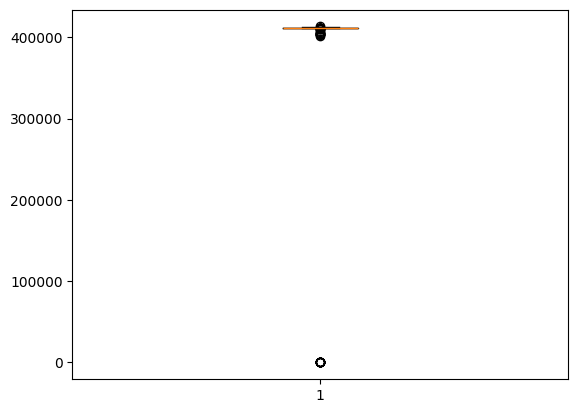

In [7]:
nunique_features = data_train.select(pl.col("*").n_unique()).to_numpy().flatten()
plt.boxplot(nunique_features)

In [8]:
cat_unique_thresh = 150
cat_condition = data_train.select(pl.col("*").n_unique() < cat_unique_thresh).to_numpy()[0]
cat_columns = data_train[:, cat_condition].drop("target", "smpl", "id", strict=False).columns
num_columns = data_train.drop("target", "smpl", "id", *cat_columns).columns

# convert cat_columns to str 
# and num_columns columns to float32 to reduce memory consumption
data_train = data_train.with_columns("target", "smpl", "id", pl.col(cat_columns).cast(pl.Int16).cast(pl.String), pl.col(num_columns).cast(pl.Float32))
data_test = data_test.with_columns("smpl", "id", pl.col(cat_columns).cast(pl.Int16).cast(pl.String), pl.col(num_columns).cast(pl.Float32))
print(f"Number of categorical columns: {len(cat_columns)}")
print(f"Number of numeric columns: {len(num_columns)}")

Number of categorical columns: 12
Number of numeric columns: 174


In [9]:
data_train[cat_columns].describe()

statistic,feature_7,feature_31,feature_60,feature_61,feature_71,feature_109,feature_122,feature_156,feature_163,feature_167,feature_179,feature_185
str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194""","""413194"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""1""","""0""","""0""","""0""","""0""","""1""","""0""","""0""","""1""","""0""","""1""","""1"""
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""9""","""4""","""9""","""6""","""2""","""7""","""4""","""6""","""9""","""6""","""9""","""99"""


### Feature processing

In [10]:
import sys; sys.path.append("automl/");
import pandas as pd
from src.automl.feature_selection.Preprocessing import create_preprocess_pipe, create_test_pipe
from src.automl.feature_selection.selectors import NanFeatureSelector

In [11]:
data_train = data_train.to_pandas()
data_test = data_test.to_pandas()

In [12]:
X_train, y_train = data_train.drop(columns=["target", "smpl", "id"]), data_train["target"]
X_test = data_test.drop(columns=["target", "smpl", "id"], errors="ignore")

In [13]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,-0.599917,-0.979222,-0.970136,0.172732,1.399724,2.227052,2,2.635267,-0.580033,1.634751,...,2.275866,-1.821970,9,-1.232141,2.244367,-0.199707,1.454468,1.522790,3,2.344804
1,0.404078,-0.228780,0.164160,0.855858,-0.051261,0.324444,2,0.277687,-0.088631,-0.697138,...,0.241131,0.558448,9,-0.934535,1.178442,0.389077,-0.361016,0.345436,2,-0.166686
2,2.318336,-1.146061,0.251657,0.080618,-0.042581,-0.829405,2,-1.050294,0.172746,1.809178,...,-1.227211,2.660182,9,2.257485,0.922272,-1.469199,-1.028045,0.907549,2,-0.557001
3,-2.423908,-0.501866,-0.499705,-0.701717,0.063560,-1.439272,2,-0.953299,-0.677438,-0.630730,...,-0.660923,0.263110,9,-0.176465,-0.570582,-2.261909,-0.785268,0.430430,2,-0.278513
4,-0.269916,-0.116197,0.699997,-1.295687,-0.562152,0.832434,2,-0.414195,-1.637757,2.467613,...,-0.413233,0.968060,9,0.749256,0.458435,-0.163953,0.856149,2.474183,2,0.426500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413189,-0.376316,-0.248051,0.029687,0.770592,1.451983,0.667144,10,0.280154,-0.943285,-2.048182,...,0.524365,1.071459,9,0.874164,0.812846,-0.024541,0.281253,0.655317,10,0.829255
413190,-0.647122,2.083018,-0.839344,-0.610396,0.623156,0.628175,4,-0.812974,0.078045,-0.228467,...,-2.096074,-0.809997,9,1.254993,0.701438,0.577077,1.087224,-0.381194,4,-1.579861
413191,0.143108,-0.051391,0.490177,1.358731,1.037290,-1.439167,10,0.175159,-1.140601,0.813128,...,0.112704,-0.926651,9,0.432671,1.294711,0.553894,-1.495652,-1.553966,73,0.476423
413192,0.077192,0.406151,0.464118,1.310711,-0.989395,-0.129746,2,-0.937032,0.825499,2.392501,...,-0.357505,0.410707,9,0.695410,-0.885913,-0.992175,0.001606,0.135896,2,-0.625887


In [14]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413194 entries, 0 to 413193
Data columns (total 186 columns):
 #    Column       Dtype  
---   ------       -----  
 0    feature_1    float32
 1    feature_2    float32
 2    feature_3    float32
 3    feature_4    float32
 4    feature_5    float32
 5    feature_6    float32
 6    feature_7    object 
 7    feature_8    float32
 8    feature_9    float32
 9    feature_10   float32
 10   feature_11   float32
 11   feature_12   float32
 12   feature_13   float32
 13   feature_14   float32
 14   feature_15   float32
 15   feature_16   float32
 16   feature_17   float32
 17   feature_18   float32
 18   feature_19   float32
 19   feature_20   float32
 20   feature_21   float32
 21   feature_22   float32
 22   feature_23   float32
 23   feature_24   float32
 24   feature_25   float32
 25   feature_26   float32
 26   feature_27   float32
 27   feature_28   float32
 28   feature_29   float32
 29   feature_30   float32
 30   feature_31   objec

In [15]:
pre_process_pipe = create_preprocess_pipe()

In [16]:
X_train_preproc = pre_process_pipe.fit_transform(X_train, y_train)
X_train_preproc.columns = X_train_preproc.columns.str.replace("remainder__", "numeric__")
X_train_preproc

[Pipeline] .. (step 1 of 6) Processing nan_cols_dropper, total=   0.4s
[Pipeline] ....... (step 2 of 6) Processing nan_imputer, total=  15.0s
[Pipeline] .... (step 3 of 6) Processing outlier_capper, total=   1.8s
[Pipeline] . (step 4 of 6) Processing corr_cols_dropper, total= 1.6min
[Pipeline] .... (step 5 of 6) Processing object_encoder, total=   4.6s
[Pipeline] .... (step 6 of 6) Processing qconst_dropper, total=   7.2s


,OneHotEncoder__feature_31_1,OneHotEncoder__feature_31_2,OneHotEncoder__feature_31_3,OneHotEncoder__feature_71_1,OneHotEncoder__feature_71_2,OneHotEncoder__feature_122_1,OneHotEncoder__feature_122_2,OneHotEncoder__feature_122_3,MeanTargetEncoder__feature_7,MeanTargetEncoder__feature_60,...,numeric__feature_174,numeric__feature_175,numeric__feature_176,numeric__feature_178,numeric__feature_180,numeric__feature_181,numeric__feature_182,numeric__feature_183,numeric__feature_184,numeric__feature_186
0,0,0,1,1,0,0,1,0,0.068080,0.073026,...,0.846383,0.115659,-1.238760,-1.821970,-1.232141,2.244367,-0.199707,1.454468,1.522790,2.344804
1,0,1,0,1,0,0,1,0,0.067929,0.067894,...,0.652971,0.301096,-0.206437,0.558448,-0.934535,1.178442,0.389077,-0.361016,0.345436,-0.166686
2,0,1,0,0,0,0,1,0,0.068080,0.068033,...,0.240410,0.582799,-0.337053,2.660182,2.257485,0.922272,-1.469199,-1.028045,0.907549,-0.557001
3,0,1,0,1,0,0,1,0,0.067884,0.067895,...,-0.876074,0.812904,-1.532245,0.263110,-0.176465,-0.570582,-2.261909,-0.785268,0.430430,-0.278513
4,0,1,0,0,0,0,1,0,0.067965,0.067985,...,-1.253787,-1.154456,-1.392709,0.968060,0.749256,0.458435,-0.163953,0.856149,2.474183,0.426500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413189,0,0,1,1,0,0,0,1,0.032948,0.032992,...,-0.681942,-0.499261,0.549532,1.071459,0.874164,0.812846,-0.024541,0.281253,0.655317,0.829255
413190,0,0,1,1,0,0,0,1,0.037255,0.033097,...,1.102499,-1.201010,0.401941,-0.809997,1.254993,0.701438,0.577077,1.087224,-0.381194,-1.579861
413191,0,0,1,1,0,0,0,1,0.033462,0.033097,...,0.404669,0.561608,-0.677259,-0.926651,0.432671,1.294711,0.553894,-1.495652,-1.553966,0.476423
413192,0,1,0,1,0,0,1,0,0.067884,0.067895,...,-0.924066,0.955181,-1.821515,0.410707,0.695410,-0.885913,-0.992175,0.001606,0.135896,-0.625887


In [17]:
X_test_preproc = pre_process_pipe.transform(X_test)
X_test_preproc.columns = X_test_preproc.columns.str.replace("remainder__", "numeric__")
X_test_preproc

,OneHotEncoder__feature_31_1,OneHotEncoder__feature_31_2,OneHotEncoder__feature_31_3,OneHotEncoder__feature_71_1,OneHotEncoder__feature_71_2,OneHotEncoder__feature_122_1,OneHotEncoder__feature_122_2,OneHotEncoder__feature_122_3,MeanTargetEncoder__feature_7,MeanTargetEncoder__feature_60,...,numeric__feature_174,numeric__feature_175,numeric__feature_176,numeric__feature_178,numeric__feature_180,numeric__feature_181,numeric__feature_182,numeric__feature_183,numeric__feature_184,numeric__feature_186
0,0,0,1,1,0,0,0,1,0.037307,0.033097,...,0.212175,-0.733340,-0.106875,-0.084685,-0.181098,-1.563904,0.640471,-0.533898,0.766548,-0.403965
1,0,1,0,1,0,0,1,0,0.067932,0.067904,...,-1.163950,-1.288689,0.991874,0.163342,-1.480209,-0.202884,-0.818295,1.365776,-0.035733,1.295792
2,0,1,0,1,0,0,1,0,0.067932,0.067904,...,0.372724,0.713148,0.295333,-1.203810,-3.018758,0.345290,0.547232,0.336083,0.279290,-0.112932
3,1,0,0,1,0,1,0,0,0.037307,0.033097,...,0.708894,0.354582,-1.280510,-0.884731,-0.471086,-1.958456,0.719939,-1.061803,0.442793,-0.646170
4,0,1,0,1,0,0,1,0,0.067932,0.067904,...,0.087891,0.137581,0.661130,0.544209,-0.238034,-1.507941,-1.537892,0.718550,-0.596825,0.349028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171914,0,1,0,1,0,0,1,0,0.067932,0.067904,...,-0.189229,0.295718,-0.738291,-0.790329,-0.640799,-0.865255,-1.085616,0.229574,1.024219,0.092745
171915,0,1,0,1,0,0,1,0,0.067932,0.067904,...,0.697819,-0.908734,-0.527788,-1.371770,0.406343,-0.316153,0.125355,1.143697,0.818442,0.061265
171916,0,1,0,1,0,0,1,0,0.067932,0.067904,...,0.619900,-0.158823,0.252984,1.491256,-0.182927,0.700957,1.407851,0.352182,-0.262134,0.497866
171917,0,0,1,1,0,0,0,1,0.037307,0.033097,...,-1.630674,-0.200306,1.626732,0.119804,-0.248971,-0.301281,-0.814825,0.591530,-0.075380,0.975215


In [18]:
test_pipe = create_test_pipe(X_train_preproc, X_test_preproc)
test_pipe.fit(X_train_preproc, y_train)

Learning rate set to 0.5
0:	test: 0.5499114	best: 0.5499114 (0)	total: 100ms	remaining: 902ms
1:	test: 0.6468074	best: 0.6468074 (1)	total: 145ms	remaining: 580ms
2:	test: 0.6542585	best: 0.6542585 (2)	total: 186ms	remaining: 433ms
3:	test: 0.6788181	best: 0.6788181 (3)	total: 238ms	remaining: 358ms
4:	test: 0.6913227	best: 0.6913227 (4)	total: 305ms	remaining: 305ms
5:	test: 0.6965299	best: 0.6965299 (5)	total: 385ms	remaining: 257ms
6:	test: 0.7038383	best: 0.7038383 (6)	total: 465ms	remaining: 199ms
7:	test: 0.7089563	best: 0.7089563 (7)	total: 543ms	remaining: 136ms
8:	test: 0.7182947	best: 0.7182947 (8)	total: 604ms	remaining: 67.1ms
9:	test: 0.7239914	best: 0.7239914 (9)	total: 659ms	remaining: 0us

bestTest = 0.7239913947
bestIteration = 9

Learning rate set to 0.5
0:	test: 0.5627608	best: 0.5627608 (0)	total: 52.1ms	remaining: 469ms
1:	test: 0.6226985	best: 0.6226985 (1)	total: 106ms	remaining: 422ms
2:	test: 0.6565617	best: 0.6565617 (2)	total: 167ms	remaining: 389ms
3:	test: 

Pipeline(steps=[('AdversarialAndPsiTests',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ExcludeByAdversarialAndPsiTests',
                                                  'drop',
                                                  <src.automl.feature_selection.Preprocessing.ValTestSelector object at 0x363868340>)],
                                   verbose_feature_names_out=False))],
         verbose=True)

In [19]:
X_train_preproc = test_pipe.transform(X_train_preproc)
X_test_preproc = test_pipe.transform(X_test_preproc)

In [22]:
X_train_preproc.assign(id=data_train["id"], target=data_train["target"], smpl=data_train["smpl"]).to_parquet("train_preproc.parquet", index=False)
X_test_preproc.assign(id=data_test["id"], smpl=data_test["smpl"]).to_parquet("test_preproc.parquet", index=False)

SyntaxError: invalid syntax (2018158212.py, line 2)